<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Mean_Shift_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mean Shift Clustering in Unsupervised Learning**

**1. What is Mean Shift Clustering?**
---
* Mean Shift is a clustering method that finds groups of data points by moving each point towards the areas where the most points are located. The algorithm does this automatically, without needing to know the number of clusters in advance.
* **Example**: Marbles on a Table
  * Imagine you scatter marbles randomly on a table. Over time, the marbles move toward areas where other marbles are clustered together. In a similar way, Mean Shift moves data points towards denser areas of points, forming clusters.
  * Shifting of these marbles is done by using KDE.



**2. What is KDE (Kernel Density Estimation)?**
---
* KDE is used to estimate where the data points are densest. It helps Mean Shift understand where the "peaks" or high-density regions are. KDE does this by placing a small window (called a kernel) around each point and averaging the points inside it to find the most populated areas.

**3. How Does Mean Shift Clustering Work?**
---
* Step 1: Initialization
    * Start by placing a small circular window around each data point in the dataset.

* Step 2: Mode Seeking
    * For each point, calculate the average position of all nearby points inside the window (this is called the mode). The point is then "shifted" towards this average position.

* Step 3: Update Centroids
    * After shifting, update the position of the point (centroid) to the new location.

* Step 4: Iteration
    * Repeat the mode seeking and shifting steps for each point until no further shifting happens—this means the point has converged to a stable position.

* Step 5: Cluster Formation
    * Once the points have stopped moving, merge the nearby points that have converged to the same location into a cluster.

**4. Advantages of Mean Shift**
---
* It automatically finds the number of clusters.
* It can detect clusters of different shapes.
* It works well with noisy data and adapts to the structure of the data.

**5. Disadvantages of Mean Shift**
---
* It can be slow for large datasets.
* The choice of the window size (bandwidth) affects the result.
* It might produce uneven-sized clusters.

**6. Applications of Mean Shift**
---
* Image Segmentation: Dividing an image into different parts based on similarity.
* Object Tracking: Tracking moving objects in video footage.
* Anomaly Detection: Identifying unusual patterns in data.
* Density Estimation: Finding regions where data points are most concentrated.

**7. Implementation of Mean Shift**
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import estimate_bandwidth

In [ ]:
cordinates = [[2,2,3],[6,7,8],[5,10,12]]
x,_ = make_blobs(n_samples=150,centers = cordinates,cluster_std=0.60)

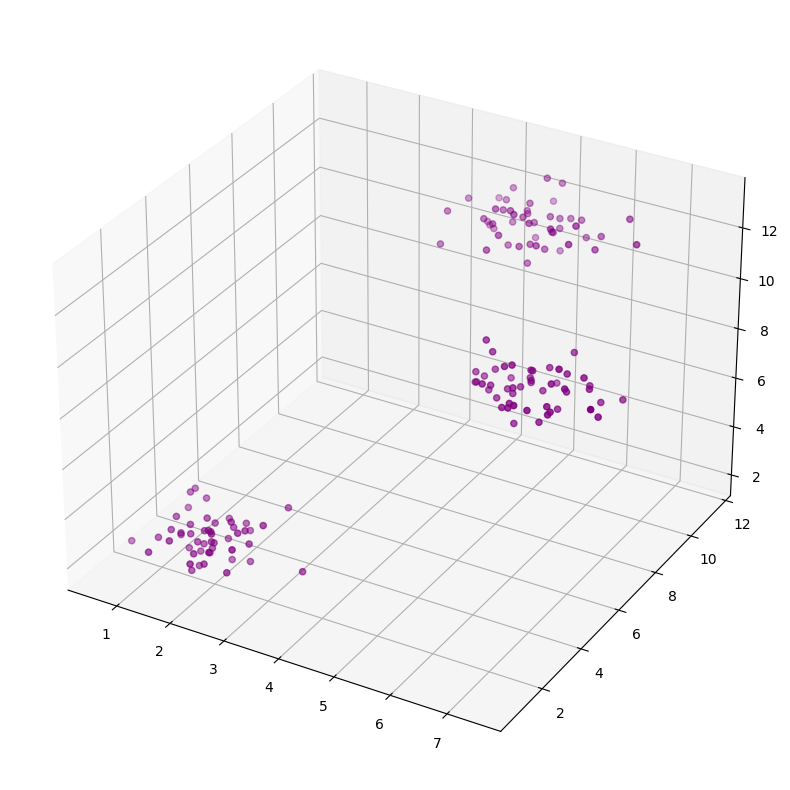

In [ ]:
data_fig = plt.figure(figsize=(10,10))
ax = data_fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2],marker ='o',color = 'purple')
plt.show()

In [ ]:
bandwidth = estimate_bandwidth(x,quantile=0.2,n_samples=500)

In [ ]:
msc = MeanShift(bandwidth=bandwidth,bin_seeding = True)
msc.fit(x)

MeanShift(bandwidth=1.4424609969847275, bin_seeding=True)

In [ ]:
cluster_centers = msc.cluster_centers_
print(cluster_centers)

[[ 1.91156539  1.97099842  3.02413883]
 [ 5.93793     6.86599436  8.04537082]
 [ 4.83461446  9.96701501 11.79985664]]


In [ ]:
labels = msc.labels_
print(labels)

[2 1 2 1 2 1 0 2 0 0 1 1 0 2 1 1 2 0 1 1 0 1 2 0 0 2 1 2 2 1 0 0 1 1 2 0 2
 0 2 1 0 1 1 2 2 0 1 1 2 0 1 1 0 0 1 2 2 1 0 2 0 1 2 2 2 2 1 0 0 2 2 2 2 2
 0 2 1 2 0 1 0 1 0 1 0 0 1 0 2 2 1 0 0 0 2 1 1 2 2 2 0 1 1 2 0 0 0 0 1 2 0
 2 1 1 0 1 0 2 0 0 1 0 0 1 2 0 0 0 1 1 2 2 1 2 1 0 0 2 2 2 1 2 1 2 1 1 1 0
 2 0]


In [ ]:
cluster_label = np.unique(labels)
n_clusters = len(cluster_label)
print(n_clusters)

3


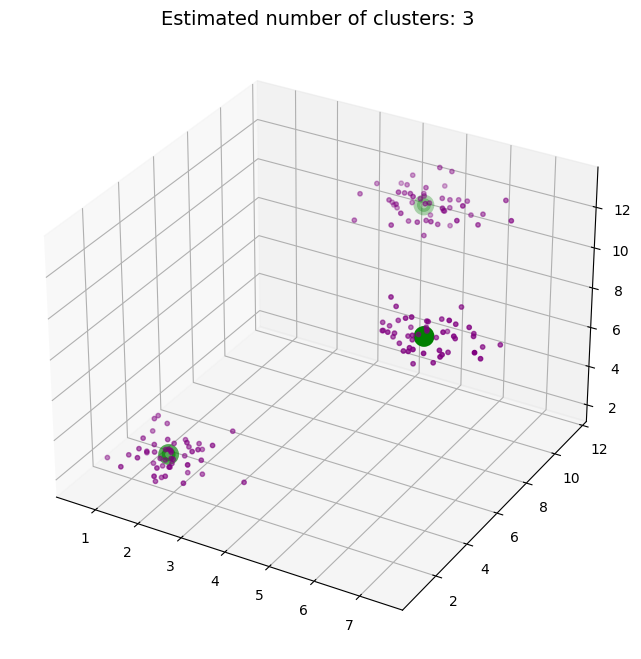

In [ ]:
msc_fig = plt.figure(figsize=(10,8))
ax = msc_fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o',color = 'purple',s=10,zorder=10)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='o',color = 'green',s=100,linewidth=5,zorder=10)

plt.title('Estimated number of clusters: %d' % n_clusters, fontsize=14)
plt.show()